## Statistical Analysis of Sachin Tendulkar performance.

OBJECTIVE: This case study deals with the statistical analysis of the famous cricker Sachin Tendulkar. In this study we'll see his pattern of scoring run, win/loss matches and try to assess his performance. We'll try to provide statistical evidence of a famous speculation that he plays for himself not for team. <br>
In addition to this we'll try to find answers to other questions such as :
- Does he score runs equally well in both the innings?
- Does winning/losing the match have any impact on him hitting fours/sixes?
- How likely India is to win if Sachin scored century?
- Whether Sachin hitting century has any relationship with winning or losing the match?
- Years in which Sachin was out of form?
- Teams against which sachin has played max matches, hit max sixes/fours.
- Average runs that Sachin can score against each team (with 95% confidence).
- Correlation between various variables with other variables.
- What are most important features in the dataset in order to preding win/loss of the game? <br>
<br>
But first we'll import some libraries.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [303]:
df = pd.read_csv("./Sachin_ODI.csv")
df.head()

First, let's check about the datatypes and null values present in the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   runs     360 non-null    int64  
 1   NotOut   360 non-null    int64  
 2   mins     360 non-null    object 
 3   bf       360 non-null    int64  
 4   fours    360 non-null    int64  
 5   sixes    360 non-null    int64  
 6   sr       360 non-null    float64
 7   Inns     360 non-null    int64  
 8   Opp      360 non-null    object 
 9   Ground   360 non-null    object 
 10  Date     360 non-null    object 
 11  Winner   360 non-null    object 
 12  Won      360 non-null    bool   
 13  century  360 non-null    bool   
dtypes: bool(2), float64(1), int64(6), object(5)
memory usage: 34.6+ KB


There are no null values. But we need to change the data type of 'Date' from object to date.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df['Year'] = pd.to_datetime(df['Date']).dt.year

### How many 1st / IInd inning matches were played by Sachin? 

In [23]:
df['Inns'].value_counts()

2    190
1    170
Name: Inns, dtype: int64

There seems not a very significant difference in the number of first and second inning matches played by Sachin.

### Analyzing the performance of matches in first and second innings

In [25]:
df.groupby(['Inns'])['runs'].agg(['mean','median','max','min'])

,mean,median,max,min
Inns,,,,
1,46.670588,31.5,200,0
2,40.173684,28.5,175,0


There is not a huge  difference in the mean and median score Sachin in both the innings.Also, mean of around 40 seems to pretty decent score. This shows that Sachin can perform really well while chasing a score.<br>
However, to support this observation that Sachin performs equally well in both the innings we'll need some statistical evidence. 

In [27]:
df_first_inns = df[df['Inns'] == 1]
df_second_inns = df[df['Inns'] == 2]

#### Running patterns in both the innings is similar?
To check if the runs scored in either of the innings is similar or follows the same pattern. We'll run T test. <br>
<br>
**H0**: Runs distribution is SAME in both innings *(Null Hypothesis)*  <br> 
**Ha**: Runs distribution is NOT SAME in both innings *(ALternate Hypothesis)*  <br>

<br>
Before that, lets first go through assumptions of T test.
- Normal distribution
- Equality of variance
- Random sampling

The variance of runs scored in first innings:45.93 and second innings are: 38.386 


Text(0.5, 1.0, 'Second Innings')

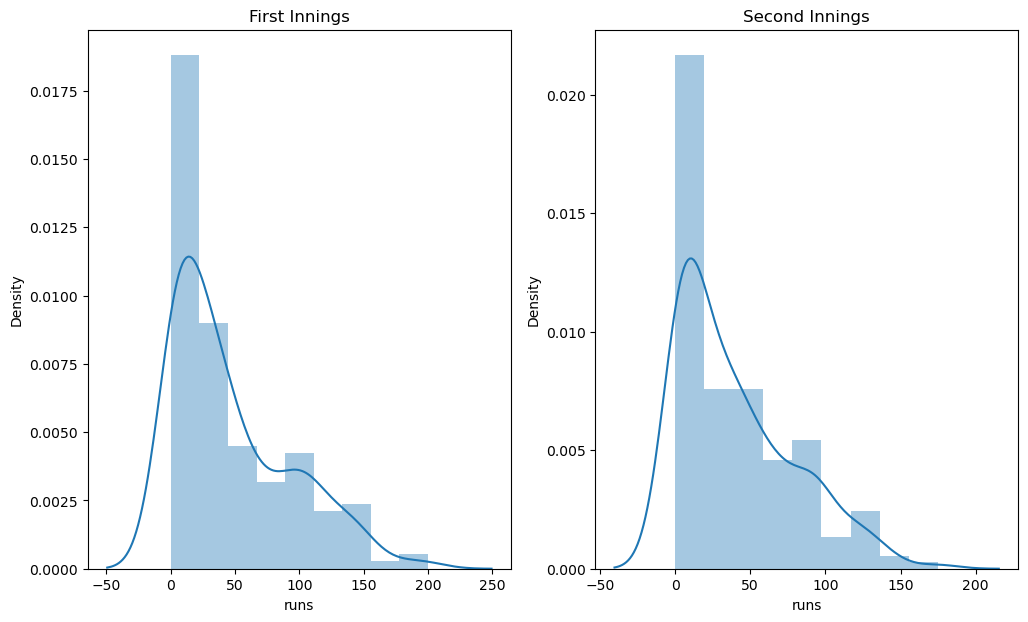

In [60]:

# check for normal distribution
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,7))

sns.distplot(df_first_inns['runs'], ax = ax[0]).set_title('First Innings')
sns.distplot(df_second_inns['runs'], ax = ax[1]).set_title('Second Innings')

Assuming that the data considered is randomly sampled. The other two assumptions of data being normally distributed and equal variance appears to be failing. <br>
However to be more sure, we'd run statistical tests. <br>
For *Normality* check we'll run **Shapiro Wilk Test** (other options: QQ test, KS test) and in order to check *homogeneity of variance* we'll use **Levene's Test**.

In [67]:
# Normality Check
from scipy.stats import shapiro

shapiro_test_stats_value_1, p_value_1 = shapiro(df_first_inns['runs'])
shapiro_test_stats_value_2, p_value_2 = shapiro(df_second_inns['runs'])

# for 95 % confidence
if p_value_1>0.05:
    print("Normality check passed: Runs in first innings are normally distributed")
else:
    print('Normality check failed: Runs in first Innings are NOT normally distributed')
    
if p_value_2>0.05:
    print("Normality check passed: Runs in second innings are normally distributed")
else:
    print('Normality check failed: Runs in second Innings are NOT normally distributed')

Normality check failed: Runs in first Innings are NOT normally distributed
Normality check failed: Runs in second Innings are NOT normally distributed


In [86]:
# check for variance
first_inns_std = round(df_first_inns['runs'].std(),3)
second_inns_std = round(df_second_inns['runs'].std(),3)

print(f'The variance of runs scored in first innings:{first_inns_std} and second innings are: {second_inns_std} ')


# homogenity check
from scipy.stats import levene

levene_stats, p_value = levene(df_first_inns['runs'],df_second_inns['runs'])

if p_value > 0.05:
    print('Homogeneity check passed: Runs in both first and second innings have similar variance')
else:
    print('Homogeneity check failed: Runs in both first and second innings DO NOT have similar variance')

The variance of runs scored in first innings:45.93 and second innings are: 38.386 
Homogeneity check passed: Runs in both first and second innings have similar variance


Hence, we can say that assumption of normal distribution in t test failed. This shows that the results obtained via T test won't be reliable much. But just to see the response of the test, we'll try to run it.

In [61]:
from scipy.stats import ttest_ind

t_stat_value, p_value = ttest_ind(df_first_inns['runs'], df_second_inns['runs'])

if p_value < 0.05:
    print(f'For 95% confidence, reject the Null Hypothesis (H0) as p-value is {p_value}')
else:
    print(f'Fail to reject null hypothesis (H0) as p-value is {p_value}, greater than 0.05.')

Fail to reject null hypothesis (H0) as p-value is 0.14483724194759962, greater than 0.05.


The result of this statistic support the speculation that Sachin performs equally well in both the innings.  <br>
<br>
We can  check for the similarty of the runs distribution in 2 innings with ANOVA also.(However, it must be kept in mind, that its result won't also be reliable; because one of its assumption of data being normally distributed failed, proved above by Shapiro-Wilk test).

ANOVA <br>
<br>
**H0**: Runs distribution is SAME in both innings *(Null Hypothesis)*  <br> 
**Ha**: Runs distribution is NOT SAME in both innings *(ALternate Hypothesis)*  <br>

In [30]:
from scipy.stats import f_oneway

f_stat_value, p_value = f_oneway(df_first_inns['runs'], df_second_inns['runs'])

if p_value < 0.05:
    print(f'For 95% confidence, reject the Null Hypothesis (H0) as p-value is {p_value}')
else:
    print(f'Fail to reject null hypothesis (H0) as p-value is {p_value}, greater than 0.05.')

Fail to reject null hypothesis (H0) as p-value is 0.1448372419476105 greater than 0.05.


Hence, if we're to believe the test results of t test and ANOVA, we can say that Sachin performs similar in terms of scoring runs in both the innings. <br>
But we can't rely on these tests due to reasons mentioned above. What test would help if the assumption of t test and ANOVA failed to do the same job? <br>
we'll use **Kruksal wallis test**. <br>
<br>
A Kruskal-Wallis Test is used to determine whether or not there is a statistically significant difference between the **medians of two or more independent groups**. It is considered to be the non-parametric equivalent of the One-Way ANOVA. This tutorial explains how to conduct a Kruskal-Wallis Test in Python

In [69]:
from scipy.stats import kruskal

kruskal_stats, p_value = kruskal(df_first_inns['runs'],df_second_inns['runs'])

if p_value > 0.05:
    print('Fail to reject Null Hypothesis: Runs pattern in both innings is similar')
else:
    print(' Reject Null Hypothesis: Runs pattern in both innings is NOT similar')

Fail to reject Null Hypothesis: Runs pattern in both innings is similar


The test results of Kruskal wallis test supports the results obtained via T-test and ANOVA.
Now, we can say that (with 95% confidence), Sachin scores run equally well in both the innings.

The other ways that can be used to check if the runs scored in both innings follows same distribution or not, we can use the following tests: <br>
- KS Test
- CDF plots
<br>
**KS test** <br>
“The Kolmogorov–Smirnov statistic quantifies a distance between the empirical distribution function of the sample and the cumulative distribution function of the reference distribution, <br>or <br> between the empirical distribution functions of two samples.”

In [70]:
# KS Test
from scipy.stats import kstest

kstest_stat, p_value = kstest(df_first_inns['runs'], df_second_inns['runs'])

if p_value > 0.05:
    print('KS test PASSED: the two distributions of runs in first and second innings are similar')
else:
    print('KS test FAILED: the two distributions of runs in first and second innings are NOT similar')

KS test PASSED: the two distributions of runs in first and second are similar


Text(0.5, 1.0, 'CDF for first and second innings')

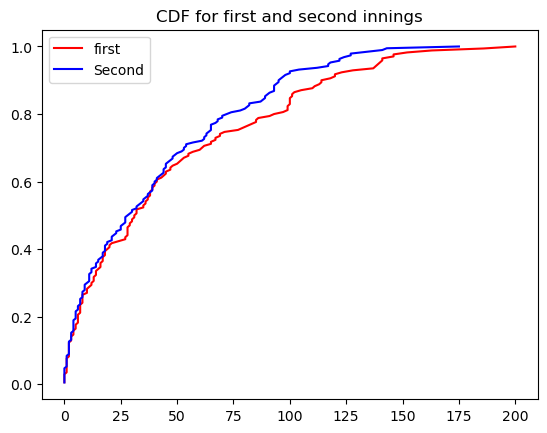

In [75]:
# Plotting ECDFs
from statsmodels.distributions.empirical_distribution import ECDF

e1 = ECDF(df_first_inns['runs'])
e2 = ECDF(df_second_inns['runs'])

plt.plot(e1.x, e1.y, c = 'r', label = 'first')
plt.plot(e2.x, e2.y, c = 'b', label = 'Second')
plt.legend()
plt.title("CDF for first and second innings")



### Analysis of won & lost matches and runs scored 

In [80]:
df.groupby(['Won'])['runs'].agg(['max','min','median'])

,max,min,median
Won,,,
False,175,0,18.0
True,200,0,39.0


In [82]:
df_won = df[df['Won'] == True]
df_lost = df[df['Won'] == False]

Now, we we'll again run the same test as above to check if Sachin performance is same in the matches lost and won or not. <br>
Before, let's first check the assumptions for the T- test of independence and ANOVA.
- Check of normal distribution of data (Shapiro-Wilk, QQ plot, KS test etc)
- Homogeneity of variance (levene test)

Normality check FAILED for matches WON
Normality check FAILED for matches LOST


Text(0.5, 1.0, 'Run distribution of matches LOST')

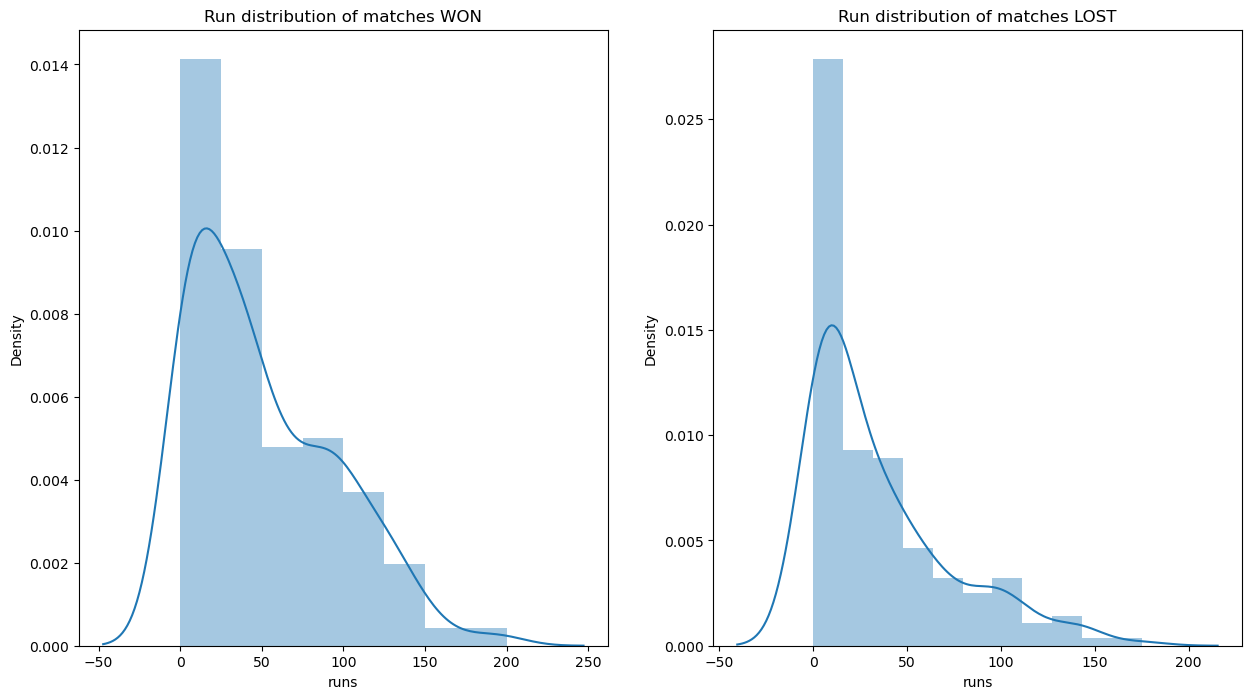

In [93]:
# Shapiro wilk test
shapiro_stats_value_1, p_value_1 = shapiro(df_won['runs'])
shapiro_stats_value_2, p_value_2 = shapiro(df_lost['runs'])

if p_value_1 > 0.05:
    print('Normality Check PASSED for matches WON')
else:
    print('Normality check FAILED for matches WON')
    
if p_value_2 > 0.05:
    print('Normality Check PASSED for matches LOST')
else:
    print('Normality check FAILED for matches LOST')
    
# for visual representation of runs scored in matches won/lost.
fig,axis = plt.subplots(1, 2,figsize =  (15,8))
sns.distplot(df_won['runs'], ax =axis[0]).set_title("Run distribution of matches WON")
sns.distplot(df_lost['runs'], ax = axis[1]).set_title("Run distribution of matches LOST")

Hence, we can say that Normality check failed. Next, we'll check for homoenity of variance 

In [98]:
# variance check via calculation
std_won = round(df_won['runs'].std(),3)
std_lost = round(df_lost['runs'].std(),3)

print(f'std of runs scored in won matches {std_won} and std of runs scored in  lost matches {std_lost}')

# by levene test

levene_stats_value, p_value = levene(df_won['runs'], df_lost['runs'])
if p_value< 0.05:
    print("Test for Homogeneity of variance FAILED")
else:
    print("Test for Homogeneity of variance PASSED")

std of runs scored in won matches 44.651 and std of runs scored in  lost matches 37.894
Test for Homogeneity of variance FAILED


Thus the two assumption for t test of independence and ANOVA failed. Thus, their test results won't be reliabe. But just to check the response of these test on such data we'll run them.

H0 : Runs scored by sachin in both the won and lost matches follow the same pattern
Ha : Runs scored by sachin in both the won and lost matches DO NOT follow the same pattern

In [103]:
# T test of indepence
ttest_ind_stat,p_value_1 = ttest_ind(df_won['runs'], df_lost['runs'])

if p_value_1< 0.05:
    print('Reject Null Hypothesis (T test of independence): Players scored/performed differently in won and lost matches.')
else:
    print('Failed to reject null hypothesis (T test of independence): Players scored/performed similary in won and lost matches.')

    
# ANOVA
anova_stat_value, p_value_2 = f_oneway(df_won['runs'], df_lost['runs'])

if p_value_2< 0.05:
    print('Reject Null Hypothesis (ANOVA): Players scored/performed differently in won and lost matches.')
else:
    print('Failed to reject null hypothesis (ANOVA): Players scored/performed similary in won and lost matches.')


Reject Null Hypothesis (T test of independence): Players scored/performed differently in won and lost matches.
Reject Null Hypothesis (ANOVA): Players scored/performed differently in won and lost matches.


Both the test statistics give the same results. For more reliability, we'll use Kruskel-wills test as it doesn't rely on assumption of 'normality' and 'homogeneity of variance' to be true.

In [104]:
kruskal_stats_value, p_value = kruskal(df_won['runs'], df_lost['runs'])

if p_value < 0.05:
    print('Reject Null Hypothesis (Kruskal wills test): Players scored/performed differently in won and lost matches.')
else:
    print('Failed to reject null hypothesis (Kruskal wills test): Players scored/performed similary in won and lost matches.')



Reject Null Hypothesis (Kruskal wills test): Players scored/performed differently in won and lost matches.


Now, with statistical evidence we can say that Sachin performed differently when the matches won and lost. <br> 
How different the performance was, we can see from below.

Text(0.5, 1.0, 'CDF for runs scored for matches won/lost')

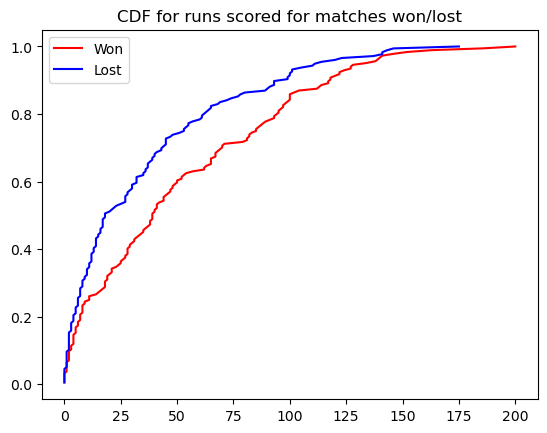

In [107]:
e_won = ECDF(df_won['runs'])
e_lost = ECDF(df_lost['runs'])

plt.plot(e_won.x, e_won.y, c = 'r', label = 'Won')
plt.plot(e_lost.x, e_lost.y, c = 'b', label = 'Lost')
plt.legend()
plt.title("CDF for runs scored for matches won/lost")

As per the above plot, it implies that if Sachin underperforms  then it is likely that team will lose the match.

#### Does Sachin hits 'fours' in similar pattern in the matches win/lost

H0: Sachin hitting fours in independent of matches won/lost
Ha: Sachin hitting fours is NOT independent of matches won/lost

REJECT null hypothesis:There is different pattern observed in fours in the matches won/lost


Text(0.5, 1.0, 'Lost')

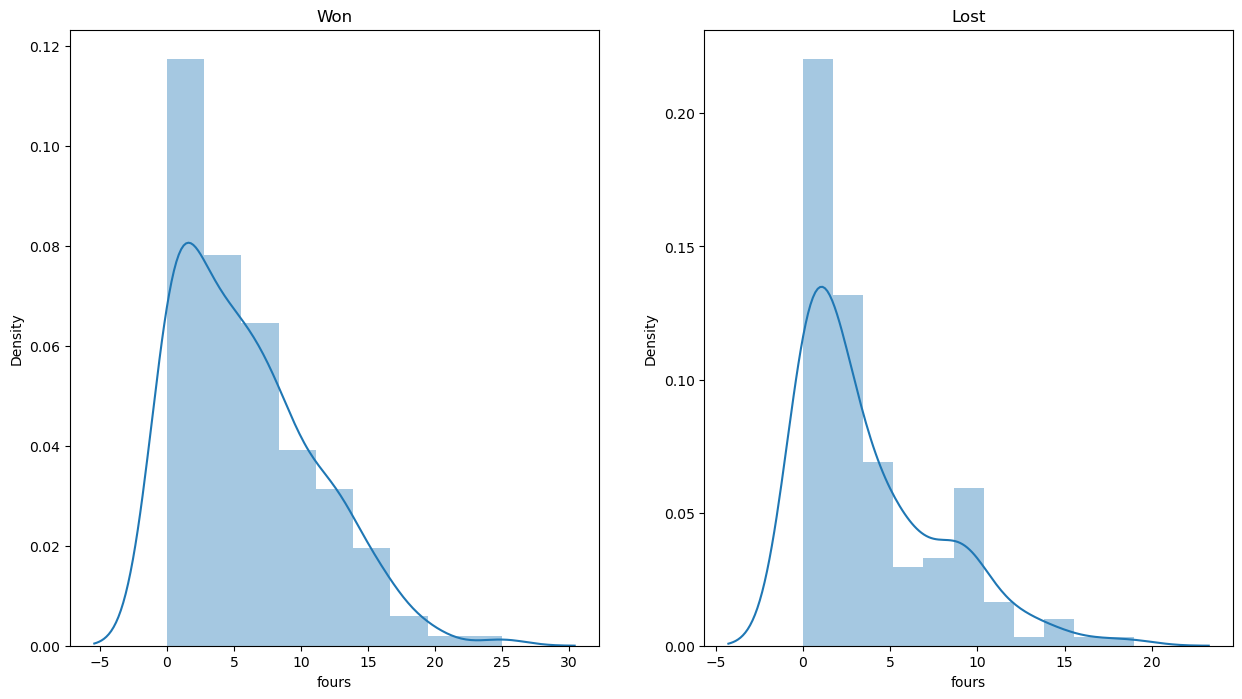

In [110]:
# check via t test of independence
ttest_ind_stat_value, p_value = ttest_ind(df_won['fours'], df_lost['fours'])

if p_value < 0.05:
    print("REJECT null hypothesis:There is different pattern observed in fours in the matches won/lost")
else:
    print("FAIL to REJECT null hypothesis:There is SIMIALR pattern observed in fours in the matches won/lost")
    
# visual for distribution of fours in matches won/lost

fig,axis = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df_won['fours'],ax = axis[0]).set_title('Won')
sns.distplot(df_lost['fours'], ax = axis[1]).set_title('Lost')

#### Does Sachin hits 'sixes' in similar pattern in the matches win/lost

H0: Sachin hitting sixes in independent of matches won/lost
Ha: Sachin hitting sixes is NOT independent of matches won/lost

FAIL to REJECT null hypothesis:There is SIMIALR pattern observed in sixes in the matches won/lost


Text(0.5, 1.0, 'Lost')

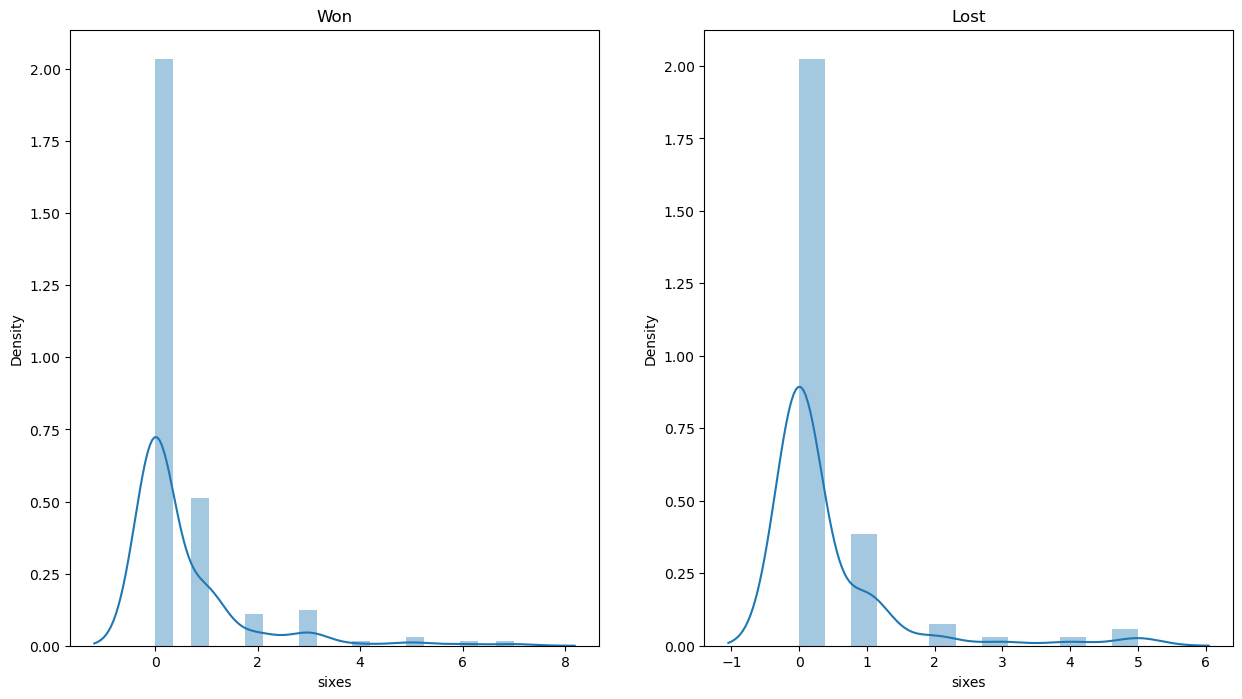

In [114]:
# check via t test of independence
ttest_ind_stat_value, p_value = ttest_ind(df_won['sixes'], df_lost['sixes'])

if p_value < 0.05:
    print("REJECT null hypothesis:There is different pattern observed in sixes in the matches won/lost")
else:
    print("FAIL to REJECT null hypothesis:There is SIMIALR pattern observed in sixes in the matches won/lost")
    
# visual for distribution of fours in matches won/lost

fig,axis = plt.subplots(1,2, figsize = (15,8))
sns.distplot(df_won['sixes'],ax = axis[0]).set_title('Won')
sns.distplot(df_lost['sixes'], ax = axis[1]).set_title('Lost')

We can say that, Sachin seems to hit equally well whether matches are won / lost.

### Analysis of  player's century and not a century

In [117]:
df.groupby(['century'])['runs'].agg(['mean','median','min','max'])

,mean,median,min,max
century,,,,
False,31.130573,23.5,0,99
True,125.913043,121.0,100,200


Whenever Sachin hit a century, he went on to score as much as 121, 50% of the times. Max that he could score was 200.

In [118]:
df_century = df[df['century'] == True]
df_not_century = df[df['century'] == False]

#### How many centuries converted into wins, and how many weren't?

In [122]:
df_won_and_century = pd.crosstab(df['Won'], df['century'])
df_won_and_century

century,False,True
Won,,
False,160,16
True,154,30


In 30 matches, Sachin scored a century and lead the team to victory. In 16 matches team lost the game, with his century. <br>
This table can also help us to predict, <br>

#### How likely is team to win if Sachin score century?

In [302]:
print(f"Chances of India winning when sachin scored century: {30*100/46}%")

Chances of India winning when sachin scored century: 65.21739130434783%


Next, we'll use chi square test to check whether there is any relationship present between the matches won and lost. If there is no relationship found then we'll be able to say statistically that Sachin plays for his own score rather than making the team win. <br>

H0: There is NO relationship present between matches won and not won.
Ha: There is significant relationship present between matches won and matches lost.

In [140]:
from scipy.stats import chi2_contingency

chi_sq_stat_value, p_value,_,cont_table = chi2_contingency(df_won_and_century)

if p_value > 0.05:
    print(f'Fail to reject null hypothesis: No relationship exists (p-value:{round(p_value,4)})')
else:
    print(f'Reject null hypothesis: Relationship exists (p-value:{round(p_value,4)})')
    
print(f'The contingency table:\n {cont_table}')

Fail to reject null hypothesis: No relationship exists (p-value:0.0586)
The contingency table:
 [[153.51111111  22.48888889]
 [160.48888889  23.51111111]]


### Time when Sachin was out of form

In [142]:
print(f"Overall mean of the runs scored: {df['runs'].mean()}")

Overall mean of the runs scored: 43.24166666666667


In [155]:
df.groupby('Year').agg(
runs_mean = ('runs','mean'),
match_count = ('runs','count'),
fours_count = ('fours','sum'),
six_count = ('sixes','sum')
)

,runs_mean,match_count,fours_count,six_count
Year,,,,
1995,37.000000,12,62,4
1996,52.666667,30,158,16
1997,28.083333,36,101,12
1998,57.393939,33,188,40
1999,39.095238,21,82,14
2000,39.151515,33,139,11
2001,56.500000,16,116,3
2002,39.000000,19,78,6
2003,54.333333,21,131,7


Considering Sachin was out of form when his pattern of scoring runs doesn't match with other years. We can use  T test to check for the same. Please keep in mind that, assumption of normality check and homoegeneity of variance must be satisfied for its reliability.

H0: Mean of runs scored in a year is similar to other years <br>
Ha: Mean of runs scored in a year is less than that of other years <br>
<br>
It is the case of left tailed  t  test.

In [165]:
# T - test : left tailed test
for y in df['Year'].unique():
    df_year = df.loc[df['Year'] == y,'runs']
    df_other_years = df.loc[df['Year'] != y,'runs']
    t_stat_value,p_value = ttest_ind(df_year,df_other_years, alternative = 'less') # for left tailed test
    if p_value <0.05:
        print(f'Sachin was out of form in year:{y}')

Sachin was out of form in year:1997
Sachin was out of form in year:2005


In [167]:
# Checkin the same thing with kruskal-wallis test
for y in df['Year'].unique():
    df_year = df.loc[df['Year'] == y,'runs']
    df_other_years = df.loc[df['Year'] != y,'runs']
    t_stat_value,p_value = kruskal(df_year,df_other_years)
    if p_value <0.05:
        print(f'Sachin was out of form in year:{y}')

Sachin was out of form in year:1997
Sachin was out of form in year:2005


Both the test return the same results i.e. Sachin was out of form in the years of 1997 and 2005.

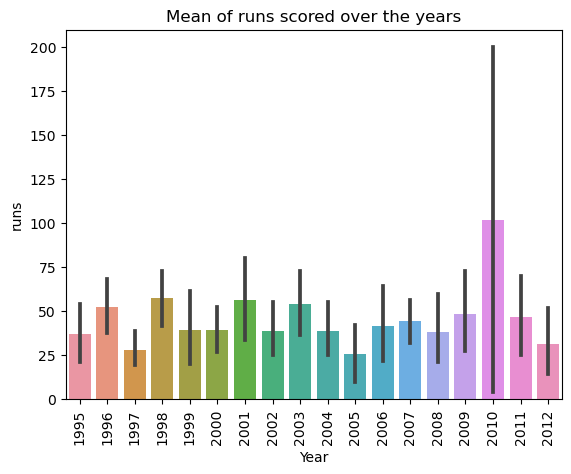

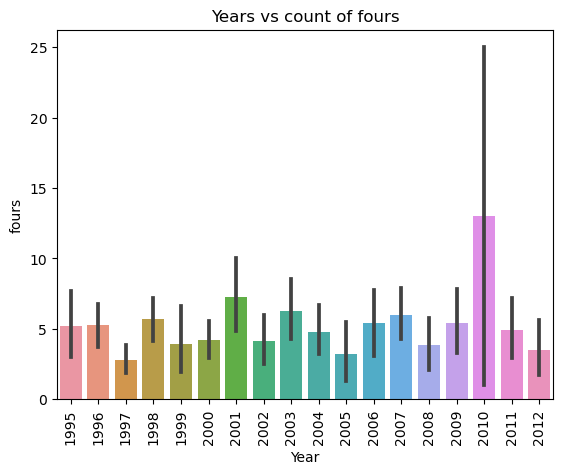

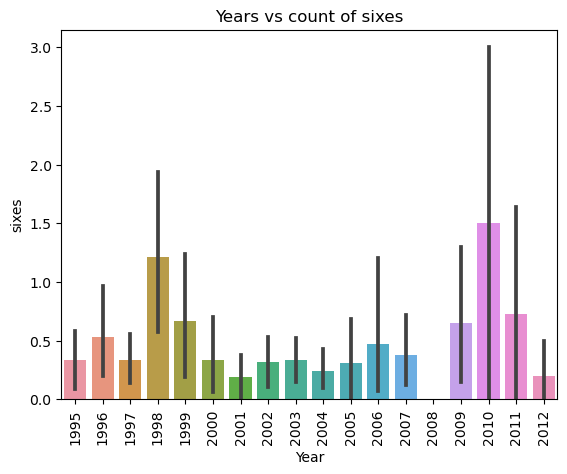

In [194]:
# Mean of runs scored over the years
sns.barplot(df['Year'], df['runs'])
plt.xticks(rotation = 90)
plt.title('Mean of runs scored over the years')
plt.show()

# count of fours
sns.barplot(df['Year'], df['fours'])
plt.xticks(rotation = 90)
plt.title('Years vs count of fours')
plt.show()

# count of sixes
sns.barplot(df['Year'], df['sixes'])
plt.xticks(rotation = 90)
plt.title('Years vs count of sixes')
plt.show()

This plot also shows that Sachin performed his best in year of 2010.

### Sachin performance against teams of different countries

In [208]:
df.groupby(["Opp"]).agg(
runs_mean = ('runs','mean'),
match_count = ('runs','count'),
fours_count = ('fours','sum'),
sixes_count = ('sixes','sum'),
won_count = ('Won','sum')
)

,runs_mean,match_count,fours_count,sixes_count,won_count
Opp,,,,,
Australia,44.786885,61,307,33,20
Bangladesh,46.000000,10,63,3,8
Bermuda,57.000000,1,2,4,1
England,46.720000,25,147,13,13
Ireland,21.000000,2,5,0,2
Kenya,71.888889,9,73,5,7
Namibia,152.000000,1,18,0,1
Netherlands,39.500000,2,13,0,2
New Zealand,39.156250,32,140,21,17


- Sachin has played maximum times against Sri Lanka (63 matches), followed by Australia (61 matches) and Pakistan (59 matches).
- Sachins has scored max fours against 'Australia' (307 fours) followed by Sri Lanka (279) and Pakistan (268). 
- Sachin hit max sixes against Australia (33) followed by Sri Lanka (25) and then against Pakistan (24).
- 

In [198]:
for op in df['Opp'].unique():
    df_opp = df.loc[df['Opp'] == op,'runs']
    df_other = df.loc[df['Opp'] != op, 'runs']
    ttest_stat, p_value = ttest_ind(df_opp, df_other)
    if p_value < 0.05:
        print(f'Sachin under-performed against the country: {op}')

Sachin under-performed against the country: Kenya


#### Performance against other countries (which played more than 5 matches)

In [206]:
df_opp = df.groupby(["Opp"]).filter(lambda x: len(x)>5)
df_opp2 = df_opp[["Opp",'runs','Won']]
df_opp2

,Opp,runs,Won
0,New Zealand,13,False
1,South Africa,37,False
2,Australia,47,True
3,Bangladesh,48,True
4,Pakistan,4,False
...,...,...,...
355,Australia,14,False
356,Sri Lanka,39,True
357,Sri Lanka,6,True
358,Bangladesh,114,False


#### Is there a relationship among  opposition teams?

We'll use chi square test for the statistical evidence. <br> This test will help to draw conclusions if opposition team has any effect on team winning or losing match.
H0: There is no relationship 
Ha: There is relationship

In [211]:
df_win_teams = pd.crosstab(df['Opp'],df['Won'])
df_win_teams

Won,False,True
Opp,,
Australia,41,20
Bangladesh,2,8
Bermuda,0,1
England,12,13
Ireland,0,2
Kenya,2,7
Namibia,0,1
Netherlands,0,2
New Zealand,15,17


In [214]:
chi2_cont_stat_value, p_value,dof,expected = chi2_contingency(df_win_teams)

if p_value < 0.05:
    print(f'Reject Null hypothesis: It implies that there is relationship (p-value: {p_value})')
else:
    print(f'fail to reject null hypothesis')
    

Reject Null hypothesis: It implies that there is relationship (p-value: 0.001468055878477474)


This implies that what team sachin is playing against have impact on winning/losing the match.

#### Range of average score against each team (with 95% confidence)

New Zealand [24.53046875 55.53203125]
South Africa [27.90852273 53.1375    ]
Australia [34.37663934 56.29508197]
Bangladesh [28.6 66.1]
Pakistan [28.40677966 48.72881356]
Sri Lanka [34.41269841 53.69920635]
Kenya [ 35.         107.55555556]
West Indies [27.68068182 61.63636364]
Zimbabwe [27.92767857 60.89285714]
England [33.36 60.64]
Netherlands [27. 52.]
Namibia [152. 152.]
U.A.E. [18. 18.]
Bermuda [57. 57.]
Ireland [ 4. 38.]


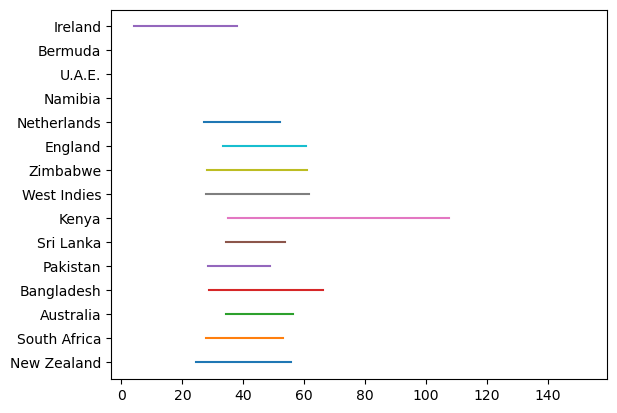

In [218]:
df_opp_runs = df[['Opp','runs']]
y = 0

for team in df_opp_runs['Opp'].unique():
    df_one_team = df_opp_runs[df_opp_runs['Opp'] == team]['runs']
    sample_means = [df_one_team.sample(len(df_one_team), replace = True).mean() for i in range(10000)]
    confidence_interval = np.percentile(sample_means,[2.5,97.5]) # 95% chances of avg lying in this range
    print(team, confidence_interval)
    plt.plot(confidence_interval,[y,y])
    y += 1
plt.yticks(range(y), df_opp_runs['Opp'].unique()) # replacing y's numerical value to opponent's team name
plt.show()

This plot implies that there are 95% chances that if Sachin plays against Sri Lanka he will score in the range of `[34.41, 53.699]`.

### Correlations

In order to check the correlation (Spearman) between variables, we'll create heatmap.

Text(0.5, 1.0, 'Heatmap for spearman correlations')

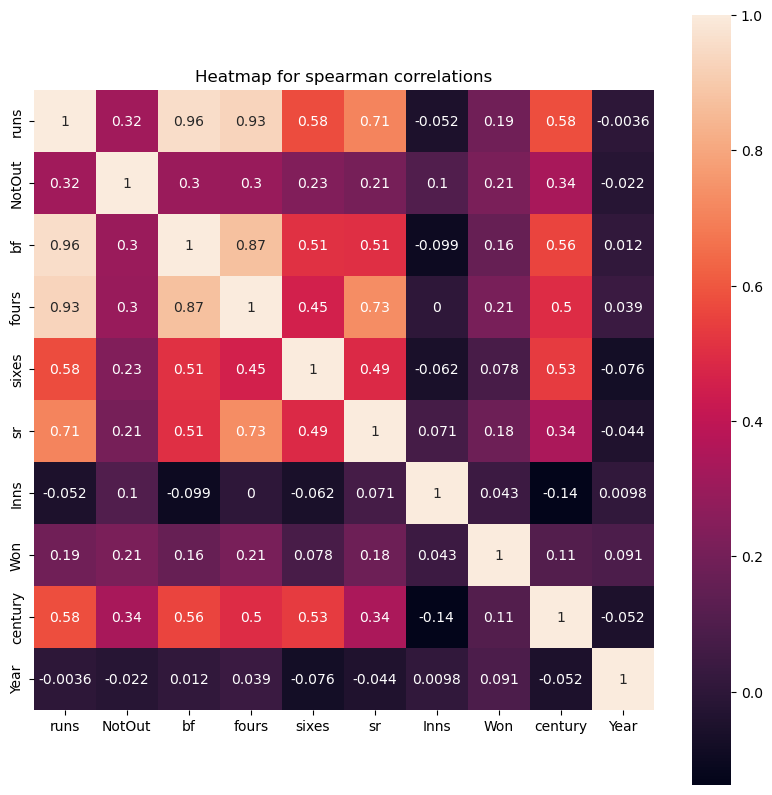

In [226]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(method = 'spearman'), annot = True,square = True)
plt.title('Heatmap for spearman correlations')

In [228]:
from scipy.stats import pearsonr,spearmanr

pearson_corr, p_value = pearsonr(df['runs'],df['bf'])
print(pearson_corr, p_value)

0.9535575848467754 1.2046739457229913e-188


Null hypothesis in correlation: There is zero correlation <br>
p-value means, the probablity of correlation being non-zero when null hypothesis is true.<br>
If it p-value < 0.05, then this implies that there is non-zero correlation (rejecting null hypothesis)<br>
<br>
Lower the p-value in correlation, higher the chances of non-zero correlation

Text(0.5, 1.0, 'Scatter plot: runs vs bf')

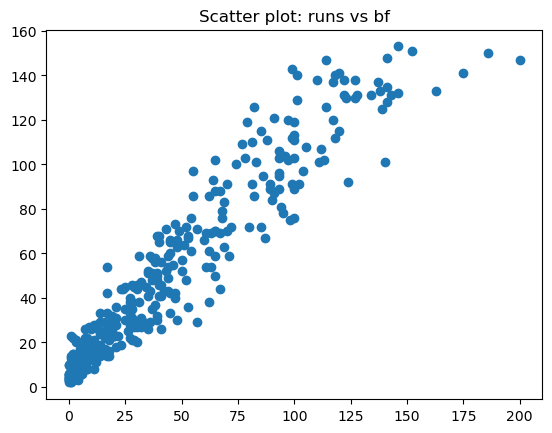

In [231]:
# for visual representation of correlation between 'runs' and 'bf'
plt.scatter(df['runs'],df['bf'])
plt.title('Scatter plot: runs vs bf')

### Feature Selection: Identifying the best features in the dataset for win/loss prediction

Since the response variable is categorical we can use chi square test for feature selection. But for that we need to encode the categorical columns first.

In [248]:
# label encoding the columns with only 2 categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['century_encoded'] = label_encoder.fit_transform(df['century'])


# using Target encoding for columns that have more than 6 unique categories present
from category_encoders import TargetEncoder
target_encoder = TargetEncoder()

df['Opp_encoded'] = target_encoder.fit_transform(df['Opp'],df['Won'])
df['Ground_encoded'] = target_encoder.fit_transform(df['Ground'],df['Won'])
df['Winner_encoded'] = target_encoder.fit_transform(df['Winner'],df['Won'])

In [259]:
df['month'] = df["Date"].dt.month
df['day'] = df['Date'].dt.day

In [270]:
print(f"% of the 'mins' columns that have missing values : {len(df[df['mins'] =='-'])*100/len(df)} %")

% of the 'mins' columns that have missing values : 6.111111111111111 %


In [272]:
# dropping the rows where 'mins' is recorded as '-'
index_drop = df[df['mins'] == '-'].index
df.drop(index_drop, inplace = True)

In [273]:
# changing the data type of column from object to int
df['mins'] = df['mins'].astype('int')

In [287]:
X = df[['runs', 'NotOut', 'mins', 'bf', 'fours', 'sixes', 'sr', 'Inns',  'month', 'day',
    'Year', 'century_encoded',
       'Opp_encoded', 'Ground_encoded', 'Winner_encoded',]]
y = df['Won']

In [288]:
chi_score_and_p_values = chi2(X,y)
chi_score_and_p_values

(array([6.13949255e+02, 1.62690939e+01, 4.89920873e+02, 3.86120157e+02,
        8.33414227e+01, 4.58865595e+00, 1.43442533e+02, 1.46456310e-01,
        6.91694685e-02, 1.24755209e-01, 2.51834184e-02, 6.27052792e+00,
        7.20546473e-01, 1.98845847e-01, 8.51317380e+01]),
 array([1.54804083e-135, 5.49530026e-005, 1.48261782e-108, 5.78808076e-086,
        6.90377092e-020, 3.21842426e-002, 4.70407541e-033, 7.01945101e-001,
        7.92549893e-001, 7.23933235e-001, 8.73910877e-001, 1.22762561e-002,
        3.95964715e-001, 6.55654062e-001, 2.79133932e-020]))

Text(0.5, 1.0, 'P values (chi sq test) vs features')

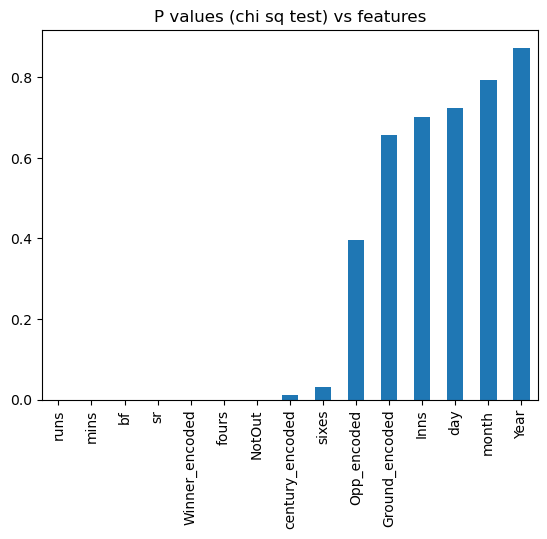

In [301]:
p_values = pd.Series(chi_score_and_p_values[1], index = X.columns)
p_values.sort_values(ascending = True,inplace = True)

p_values.plot.bar()
plt.title("P values (chi sq test) vs features")

These variable like 'Year', 'month', 'day', 'Inns have very high p-values. THis implies that these variables are independent of the response variable 'Won'. Thus, they are not important features for model training. 
<br>
This shows that the most important feature in 'runs' followed by 'mins'.


We can achieve same results as above using **selectKBest** from sklearn.

In [294]:
from sklearn.feature_selection import SelectKBest, chi2

select_kbest_classifier = SelectKBest(score_func = chi2, k = 5).fit_transform(X,y)

In [298]:
select_kbest_classifier[:5]

array([[1.30000000e+01, 3.00000000e+01, 1.50000000e+01, 8.66600000e+01,
        3.63374190e-01],
       [3.70000000e+01, 7.50000000e+01, 5.10000000e+01, 7.25400000e+01,
        1.58457487e-01],
       [4.70000000e+01, 6.50000000e+01, 4.00000000e+01, 1.17500000e+02,
        9.99999963e-01],
       [4.80000000e+01, 3.70000000e+01, 3.00000000e+01, 1.60000000e+02,
        9.99999963e-01],
       [4.00000000e+00, 1.30000000e+01, 9.00000000e+00, 4.44400000e+01,
        1.37458949e-01]])

In [299]:
X

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,month,day,Year,century_encoded,Opp_encoded,Ground_encoded,Winner_encoded
0,13,0,30,15,3,0,86.66,1,2,16,1995,0,0.526588,0.535139,0.363374
1,37,0,75,51,3,1,72.54,2,2,18,1995,0,0.355065,0.438609,0.158457
2,47,0,65,40,7,0,117.50,2,2,22,1995,0,0.330856,0.574720,1.000000
3,48,0,37,30,9,1,160.00,2,4,5,1995,0,0.588805,0.442270,1.000000
4,4,0,13,9,1,0,44.44,2,4,7,1995,0,0.491914,0.442270,0.137459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,14,0,34,15,2,0,93.33,2,2,26,2012,0,0.330856,0.454357,0.072502
356,39,0,45,30,5,0,130.00,2,2,28,2012,0,0.554961,0.551240,1.000000
357,6,0,25,19,1,0,31.57,1,3,13,2012,0,0.554961,0.557794,1.000000
358,114,0,205,147,12,1,77.55,1,3,16,2012,1,0.588805,0.557794,0.438609


As per SelectKBest results, 5 most important features are : 'runs', 'mins', 'bf', 'sr','Winner_encoded' in order to predict winning/losing the match. <br>
We can also use ANOVA with selectKBest in order to get most important features when the target variable is continous.